In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import metrics, model_selection

In [3]:
train = pd.read_csv("celestial_train.csv")
test = pd.read_csv("celestial_test.csv")

train.head()

,id,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,GALAXY
1,1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,GALAXY
2,2,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,GALAXY
3,3,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,1.424659,5026,55855,741,QSO
4,4,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,0.660012,6625,56386,719,GALAXY


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50000 non-null  int64  
 1   alpha        50000 non-null  float64
 2   delta        50000 non-null  float64
 3   u            50000 non-null  float64
 4   g            50000 non-null  float64
 5   r            50000 non-null  float64
 6   i            50000 non-null  float64
 7   z            50000 non-null  float64
 8   run_ID       50000 non-null  int64  
 9   rerun_ID     50000 non-null  int64  
 10  cam_col      50000 non-null  int64  
 11  field_ID     50000 non-null  int64  
 12  spec_obj_ID  50000 non-null  float64
 13  redshift     50000 non-null  float64
 14  plate        50000 non-null  int64  
 15  MJD          50000 non-null  int64  
 16  fiber_ID     50000 non-null  int64  
 17  class        50000 non-null  object 
dtypes: float64(9), int64(8), object(1)
memory usag

In [12]:
train['class'].value_counts()

0    29729
2    10703
1     9568
Name: class, dtype: int64

In [9]:
train['class'].value_counts(1)*100

GALAXY    59.458
STAR      21.406
QSO       19.136
Name: class, dtype: float64

In [13]:
le = LabelEncoder()
train['class'] = le.fit_transform(train['class'])
train['class'] = train['class'].astype(int)

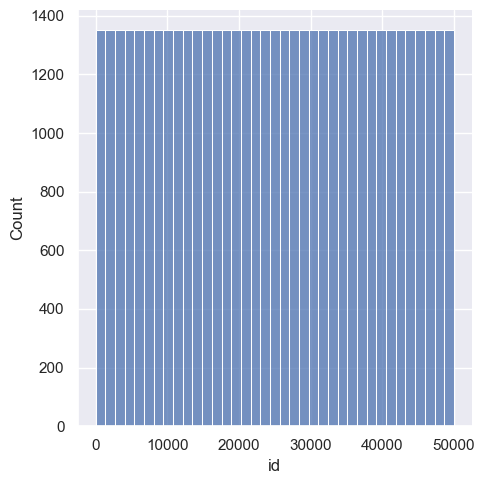

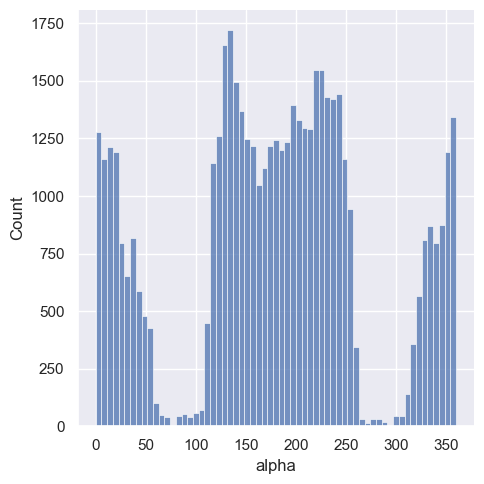

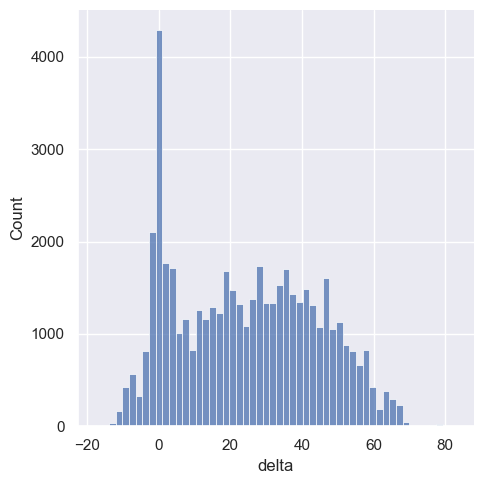

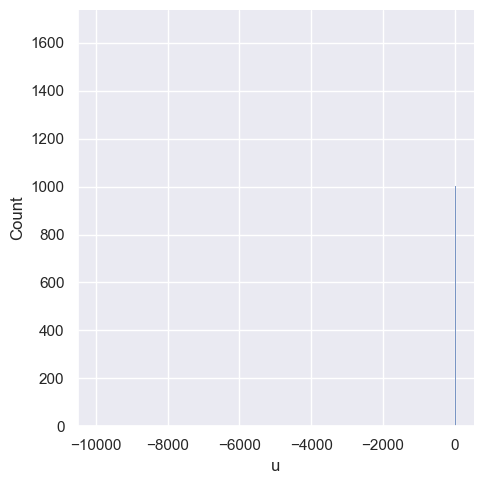

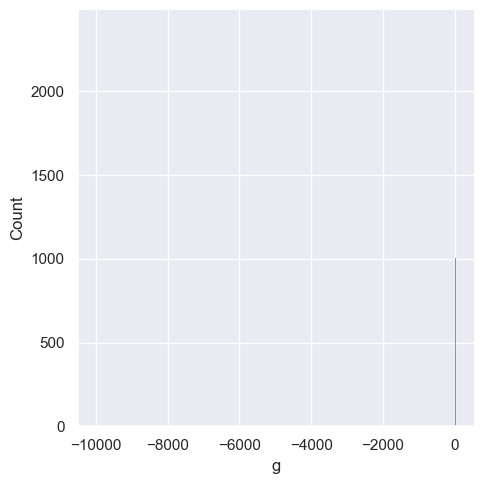

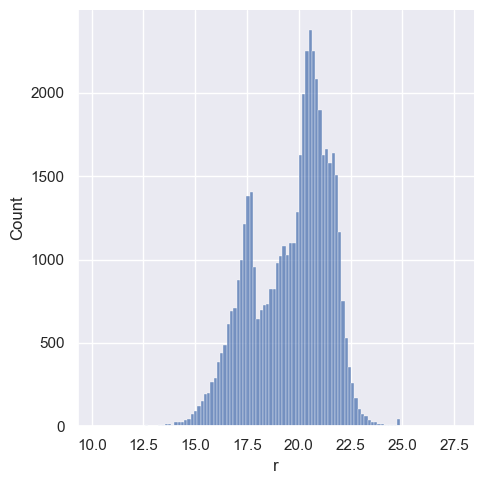

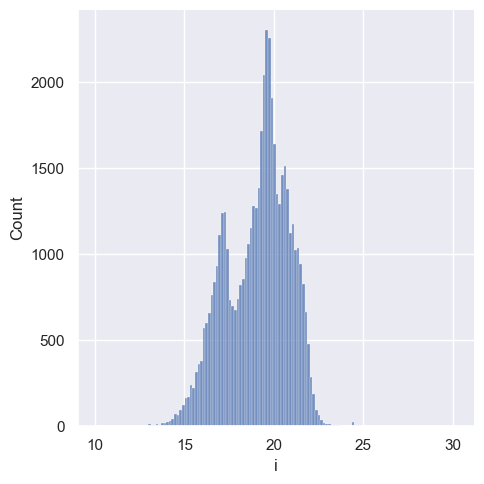

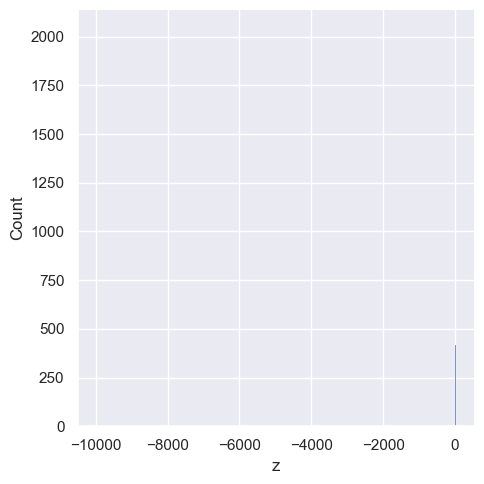

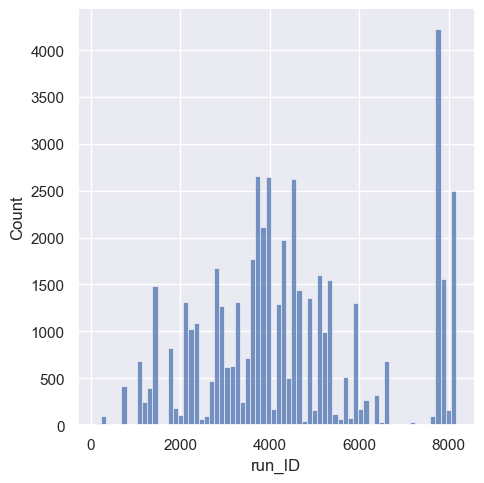

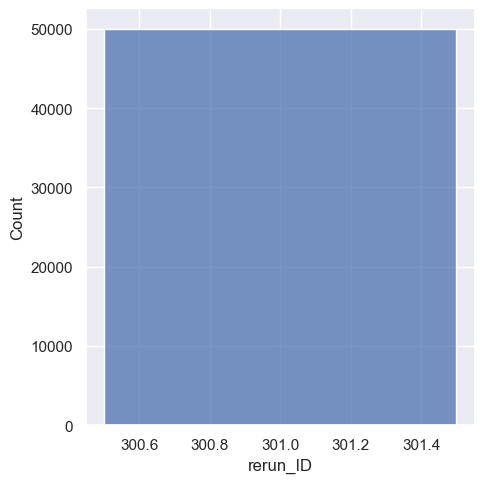

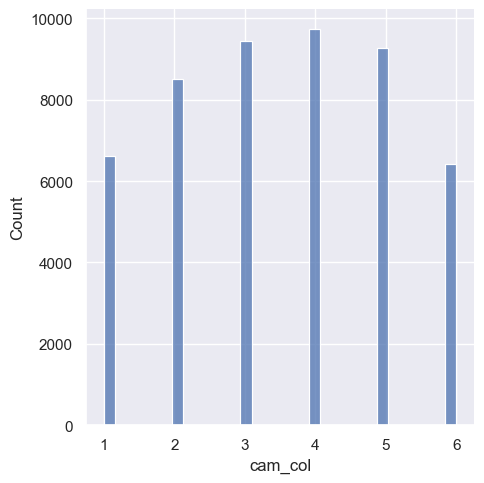

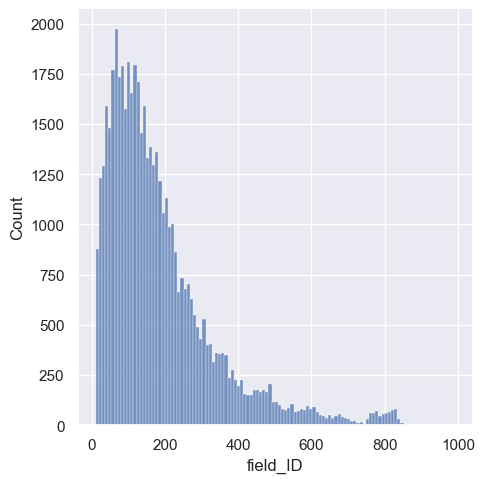

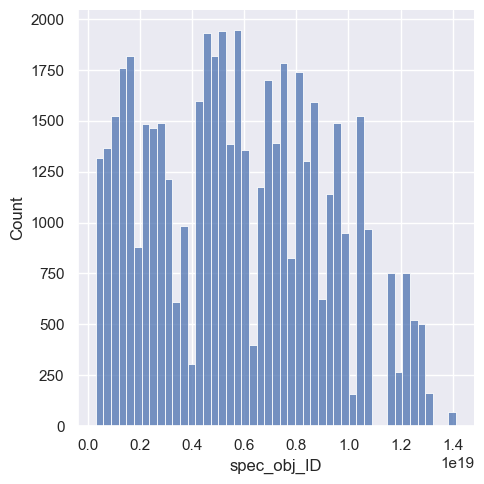

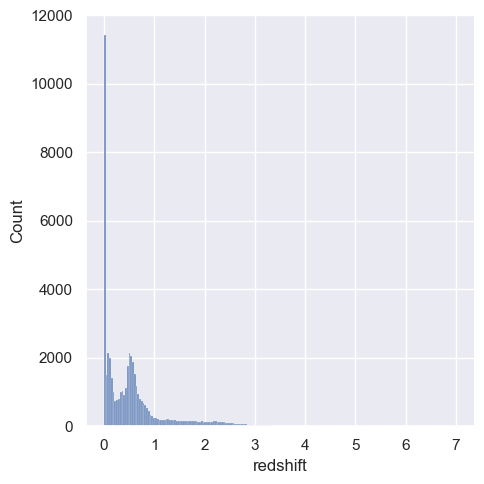

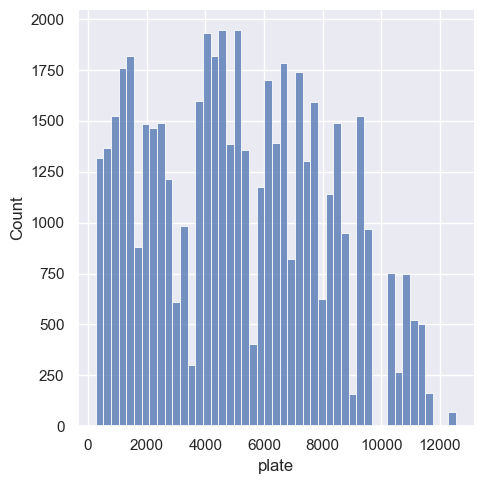

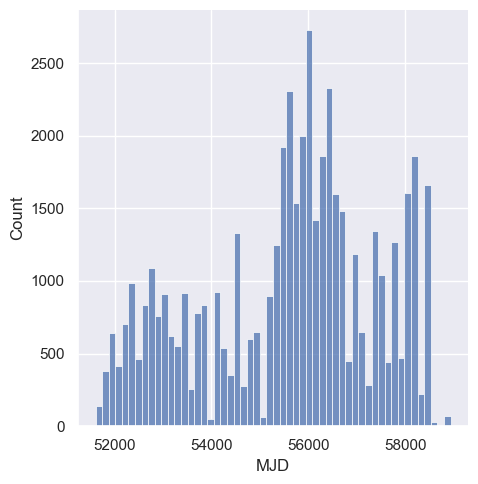

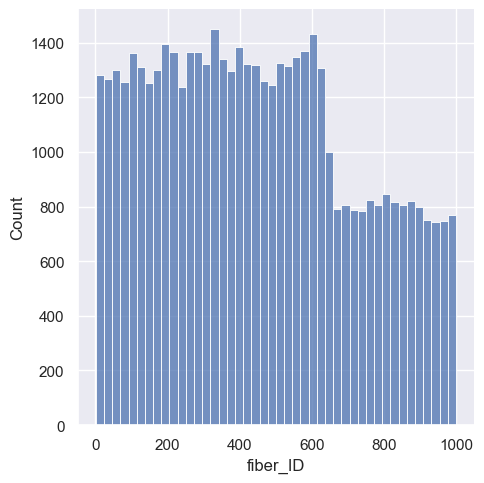

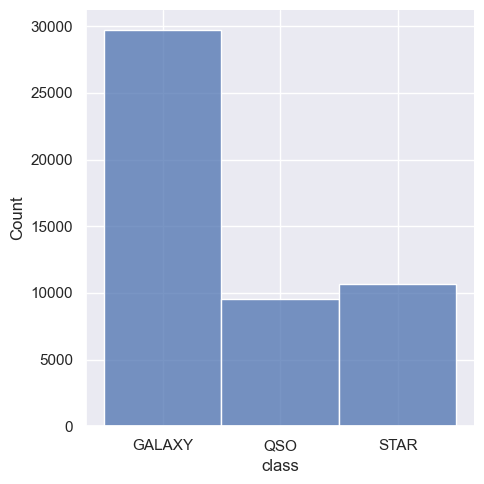

In [5]:
columns = train.columns
sns.set_theme(style="darkgrid")
for col in columns:
    if col != 'id' or col != 'class':
        sns.displot(train, x=col)

In [7]:
train.isnull().sum()

id             0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
redshift       0
plate          0
MJD            0
fiber_ID       0
class          0
dtype: int64

In [8]:
train.duplicated().sum()

0

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,50000.00000,24999.50000,14433.90107,0.00000,12499.75000,24999.50000,37499.25000,49999.00000
alpha,50000.00000,178.20295,96.30244,0.01334,127.97261,181.66333,234.14739,359.99981
delta,50000.00000,24.24911,19.67732,-17.63620,5.32668,23.91783,40.08665,83.00052
u,50000.00000,21.87534,44.87227,-9999.00000,20.33730,22.17317,23.68399,32.78139
g,50000.00000,20.42530,44.85540,-9999.00000,18.95028,21.09732,22.11915,31.60224
r,50000.00000,19.63963,1.85371,10.19460,18.12086,20.11918,21.04051,27.59332
i,50000.00000,19.07818,1.75720,10.05509,17.70778,19.39711,20.39303,30.16359
z,50000.00000,18.56316,44.83561,-9999.00000,17.43774,18.99762,19.91377,29.38374
run_ID,50000.00000,4475.17880,1962.50691,109.00000,3185.00000,4188.00000,5326.00000,8162.00000
rerun_ID,50000.00000,301.00000,0.00000,301.00000,301.00000,301.00000,301.00000,301.00000


In [14]:
train.nunique()

id             50000
alpha          50000
delta          50000
u              48318
g              48107
r              47885
i              47964
z              47918
run_ID           417
rerun_ID           1
cam_col            6
field_ID         835
spec_obj_ID    50000
redshift       49733
plate           6075
MJD             2156
fiber_ID        1000
class              3
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

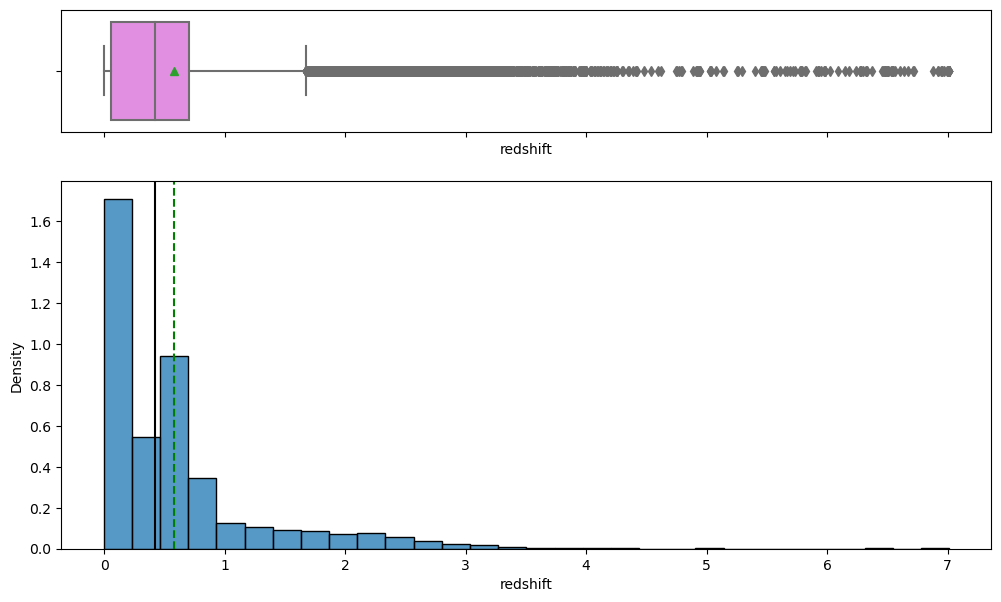

In [5]:
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None, stat='density'):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, stat = 'density') if bins else sns.histplot(data=data, x=feature, kde=kde, stat = 'density', ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

hist_box(train,'redshift', bins = 30)

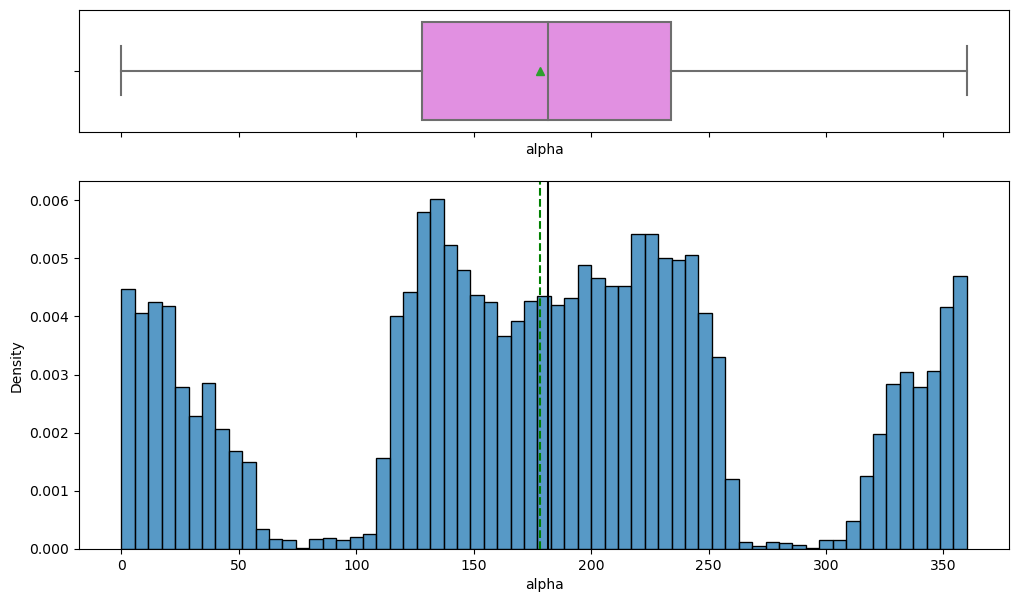

In [27]:
hist_box(train,'alpha')

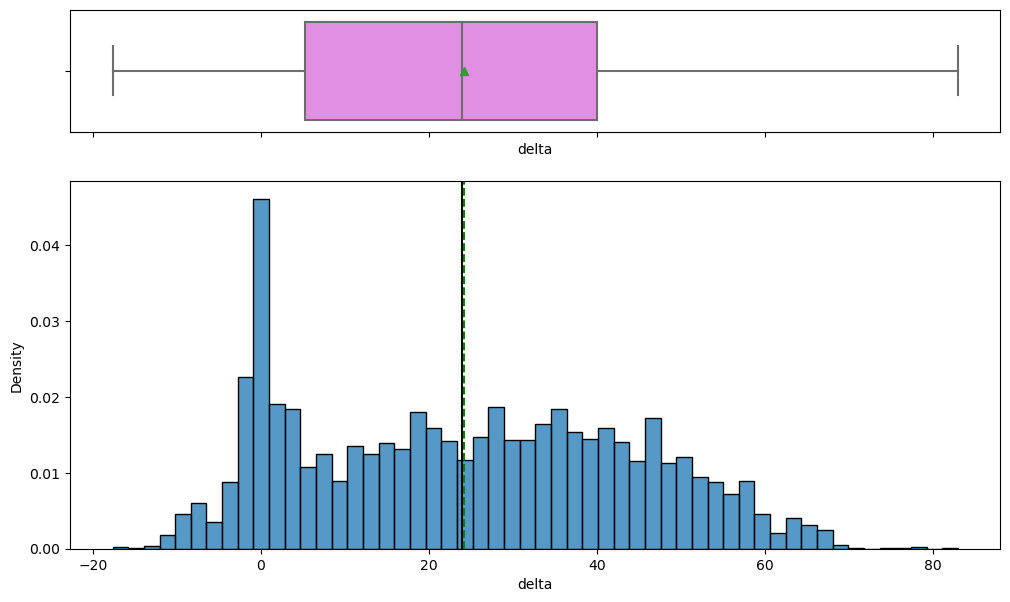

In [28]:
hist_box(train,'delta')

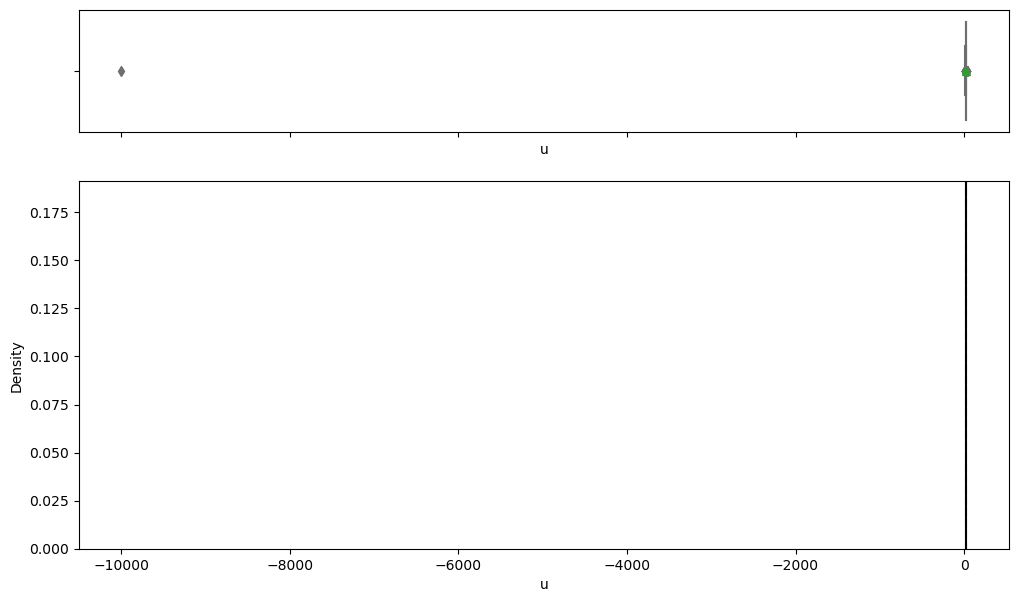

In [33]:
hist_box(train,'u')

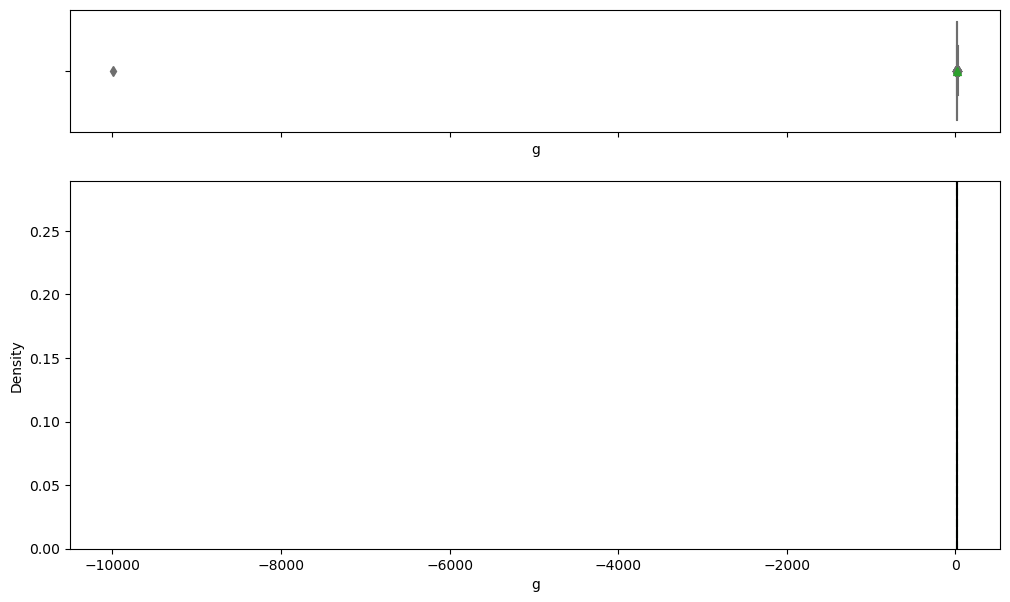

In [30]:
hist_box(train,'g')

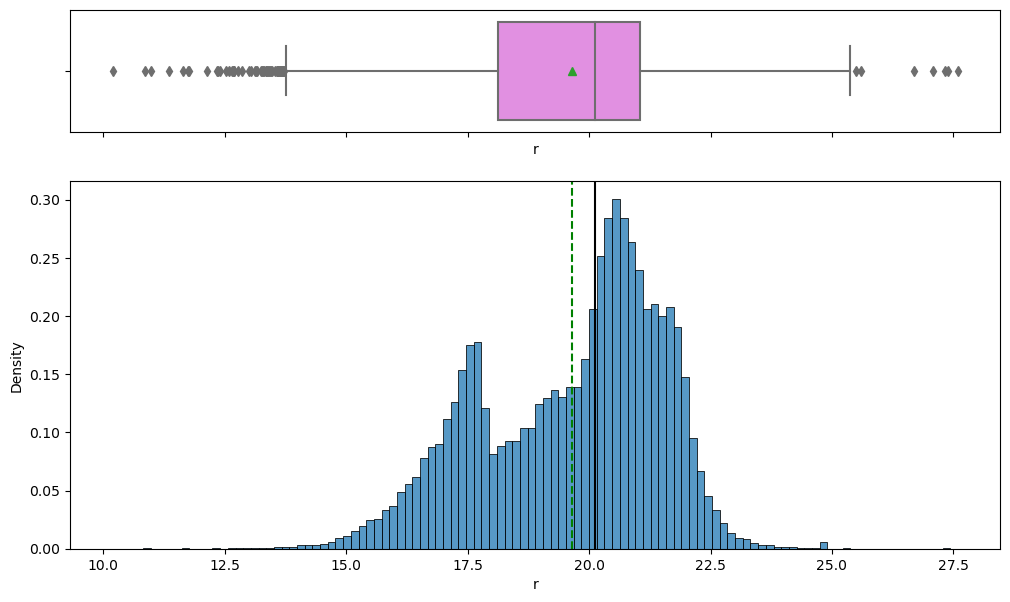

In [31]:
hist_box(train,'r')

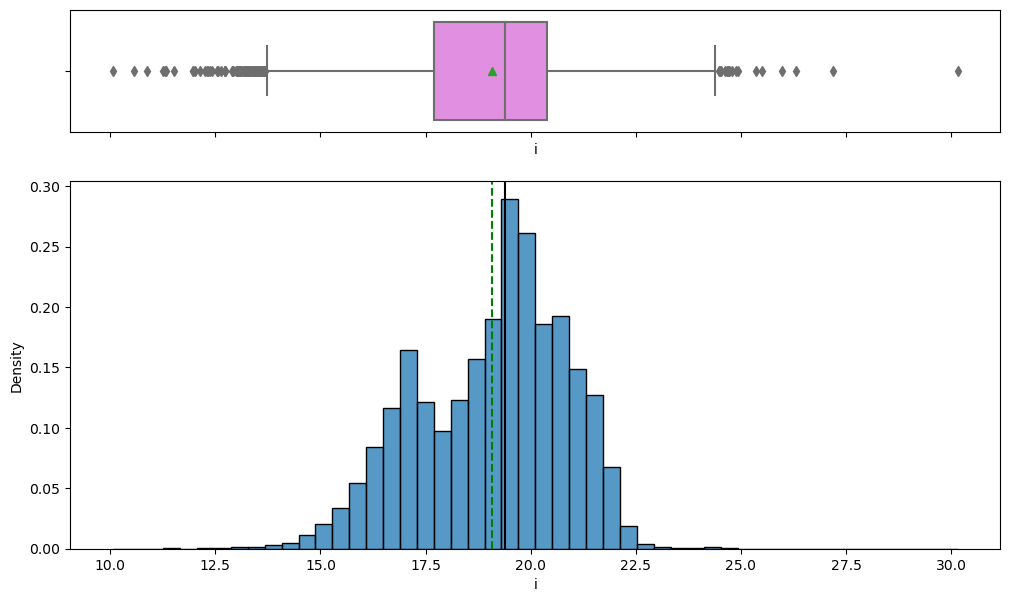

In [44]:
hist_box(train,'i', bins=50)

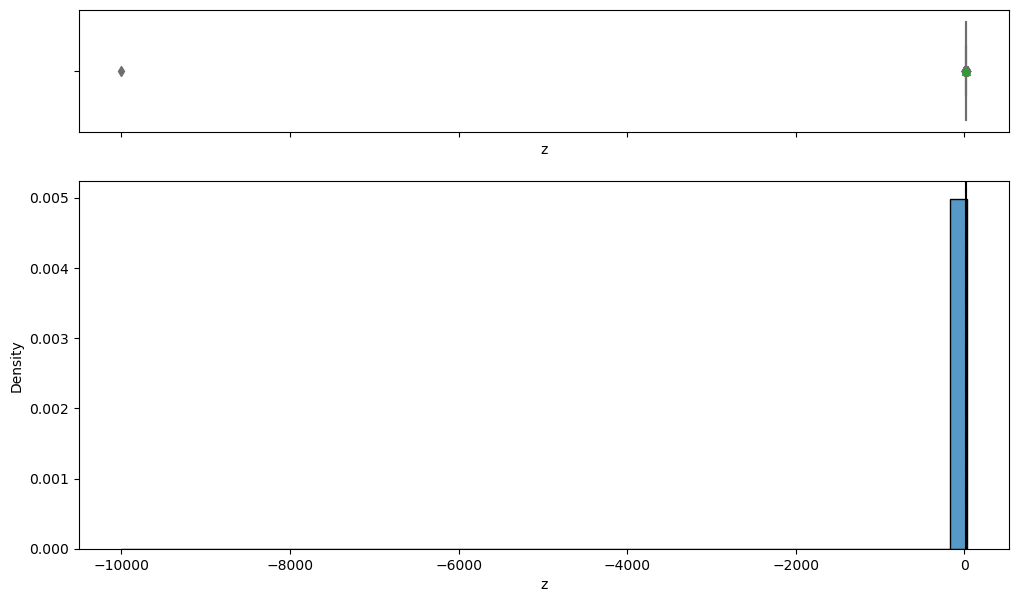

In [45]:
hist_box(train,'z', bins=50)

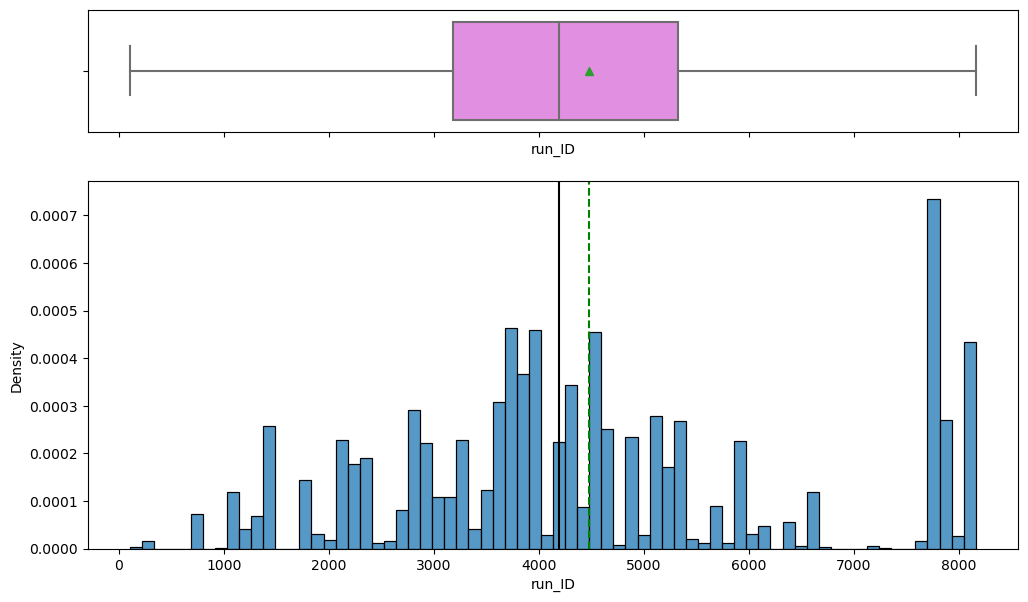

In [37]:
hist_box(train,'run_ID')

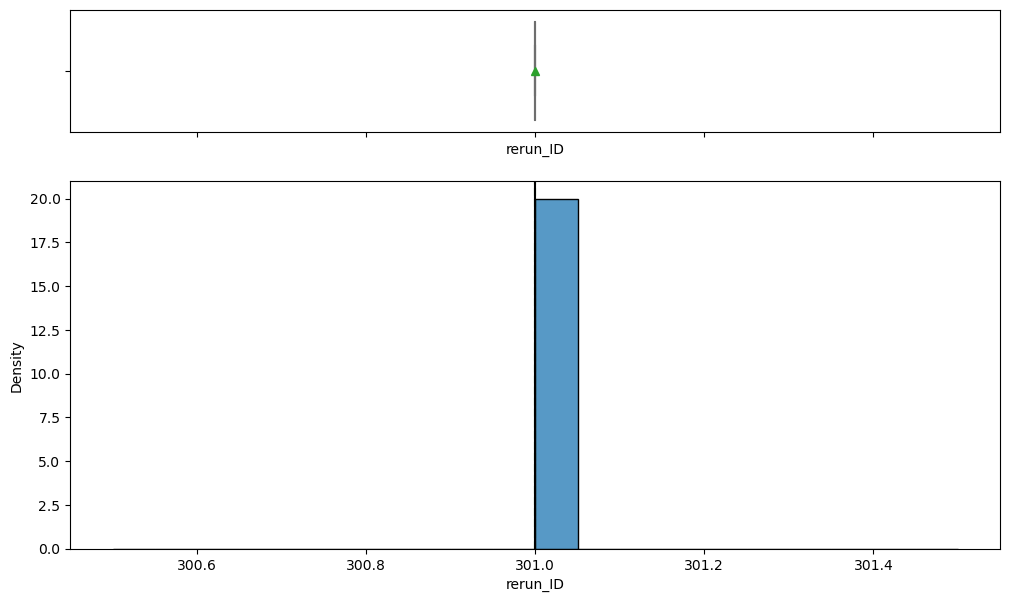

In [46]:
hist_box(train,'rerun_ID', bins=20)

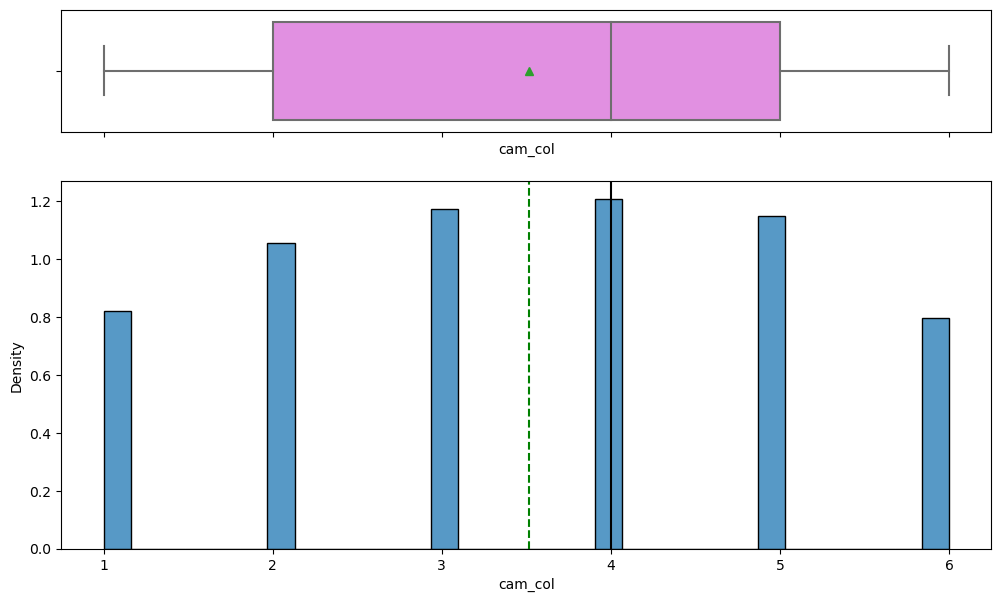

In [39]:
hist_box(train,'cam_col')

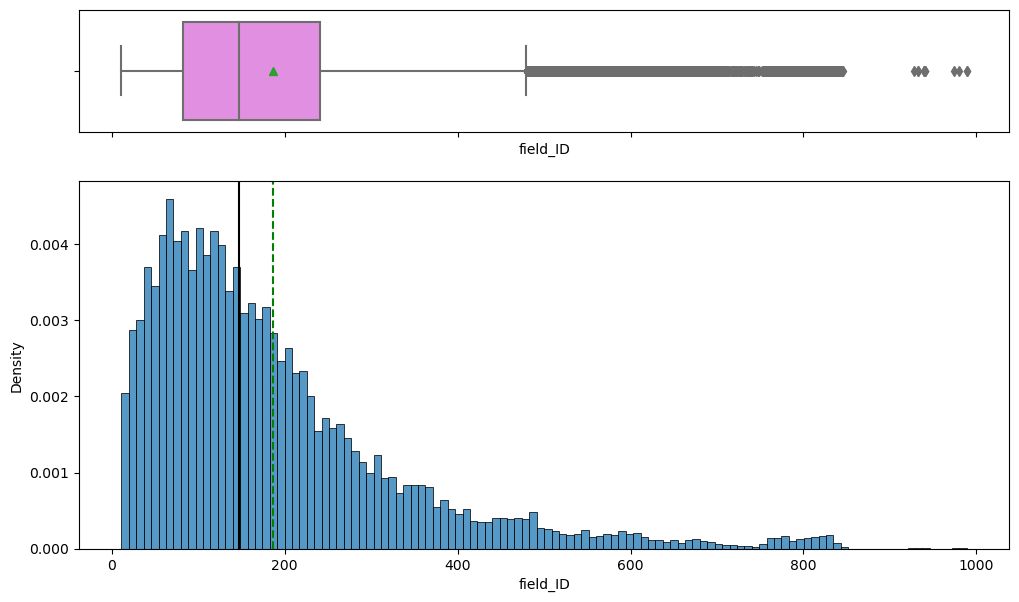

In [40]:
hist_box(train,'field_ID')

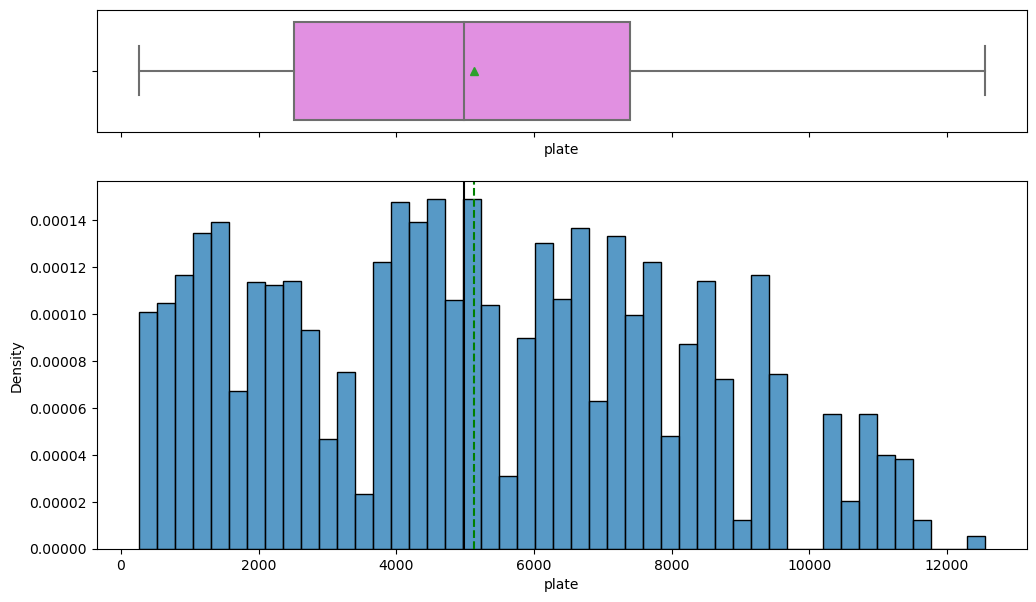

In [41]:
hist_box(train,'plate')

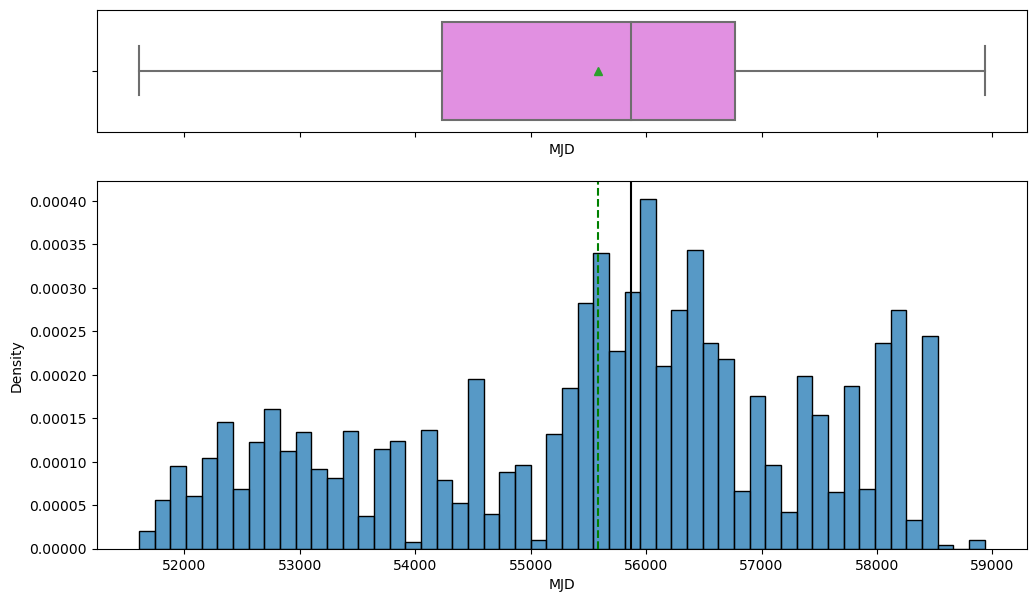

In [42]:
hist_box(train,'MJD')

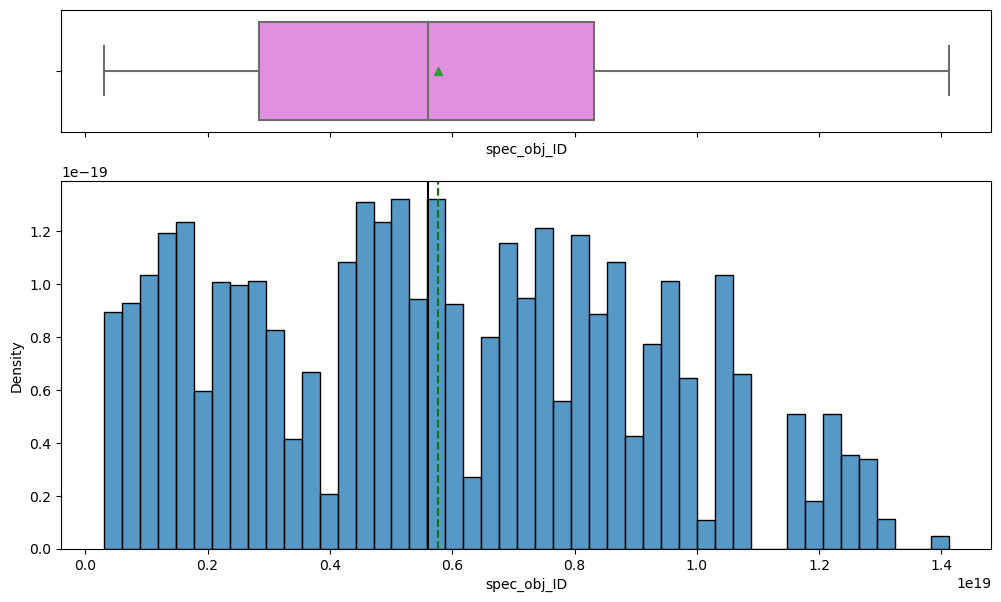

In [6]:
hist_box(train,'spec_obj_ID')

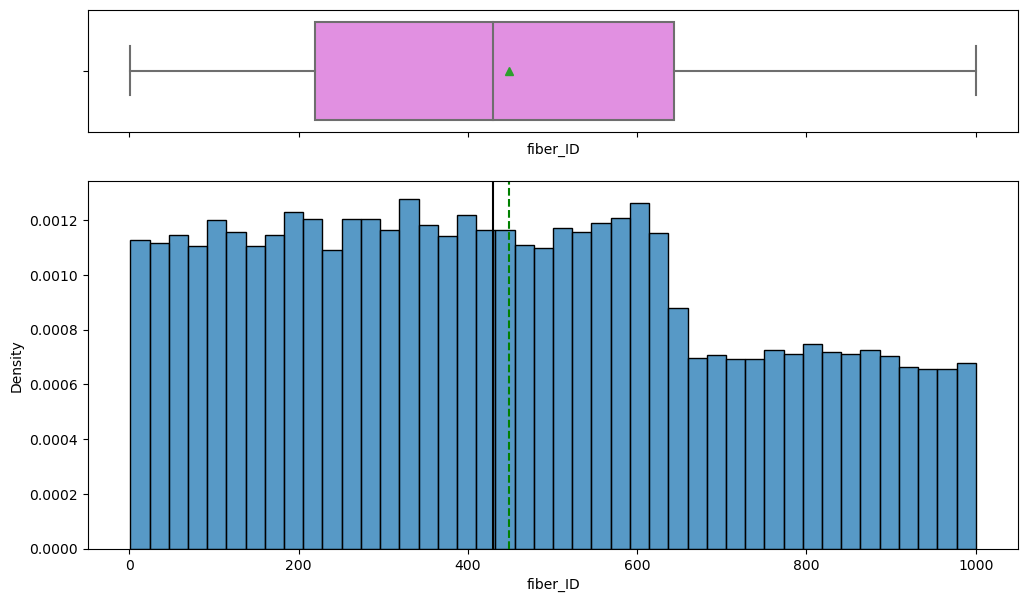

In [7]:
hist_box(train,'fiber_ID')

## Bivariate Analysis

In [10]:
def plot(column):
    for i in range(3):
        sns.kdeplot(data=train[train["class"] == i][column], label = le.inverse_transform([i]))
    sns.kdeplot(data=train[column],label = ["All"])
    plt.legend();
    
def log_plot(column):
    for i in range(3):
        sns.kdeplot(data=np.log(train[train["class"] == i][column]), label = le.inverse_transform([i]))
    sns.kdeplot(data=np.log(train[column]),label = ["All"])
    plt.legend();

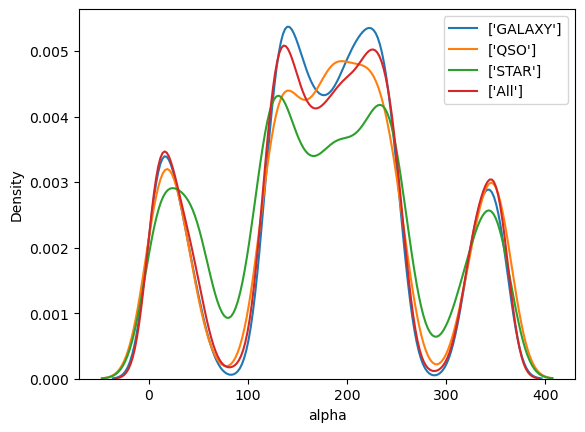

In [14]:
plot('alpha')

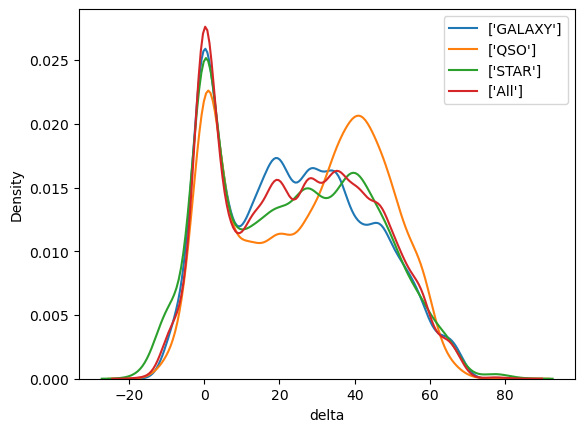

In [15]:
plot('delta')

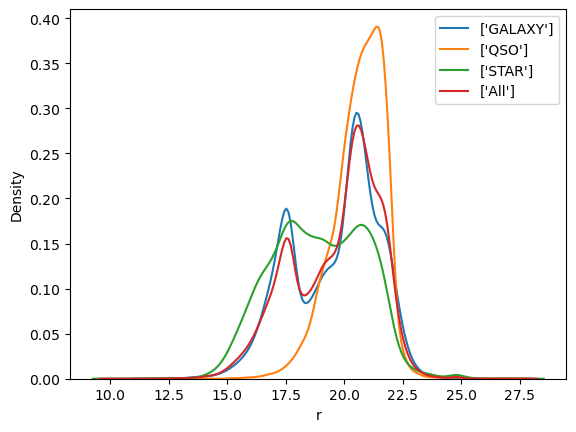

In [16]:
plot('r')

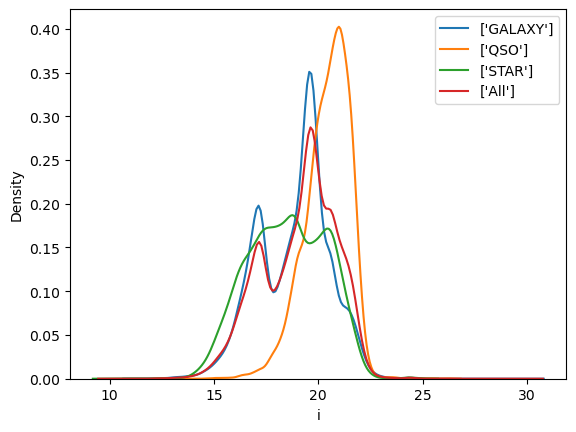

In [17]:
plot('i')

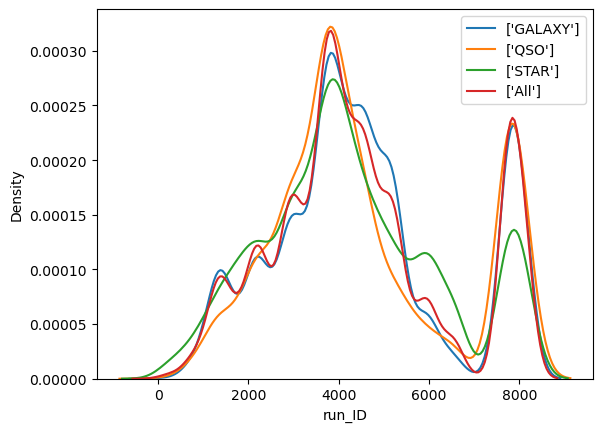

In [18]:
plot('run_ID')

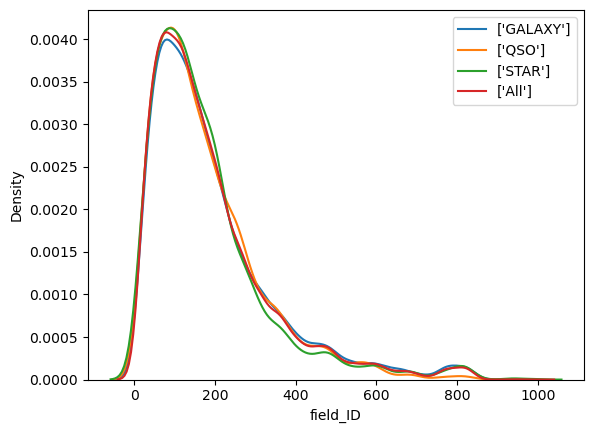

In [19]:
plot('field_ID')

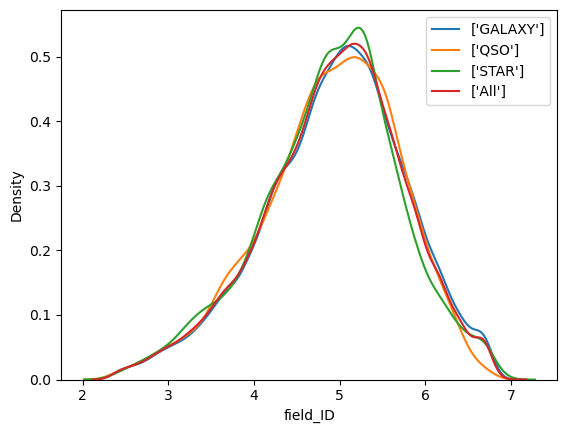

In [32]:
log_plot('field_ID')

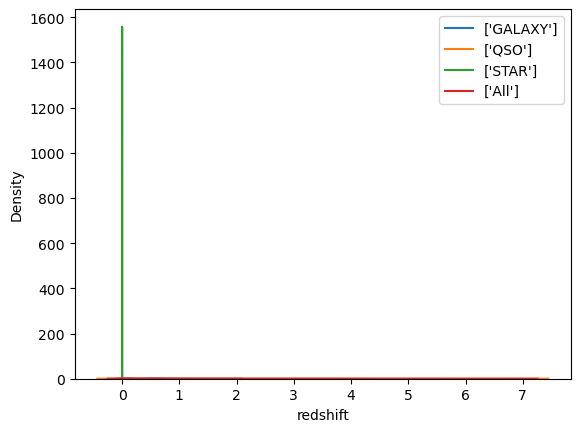

In [20]:
plot('redshift')

/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


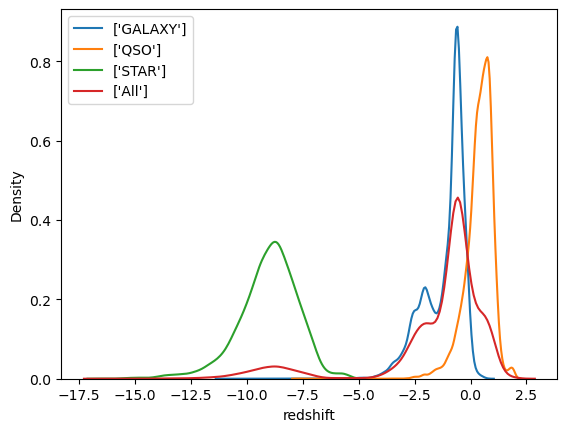

In [21]:
log_plot('redshift')

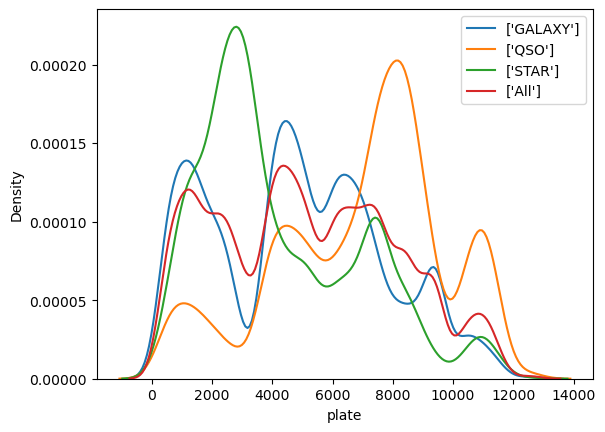

In [22]:
plot('plate')

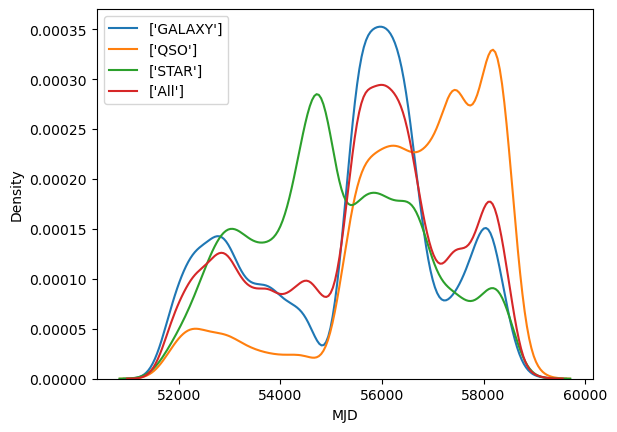

In [23]:
plot('MJD')

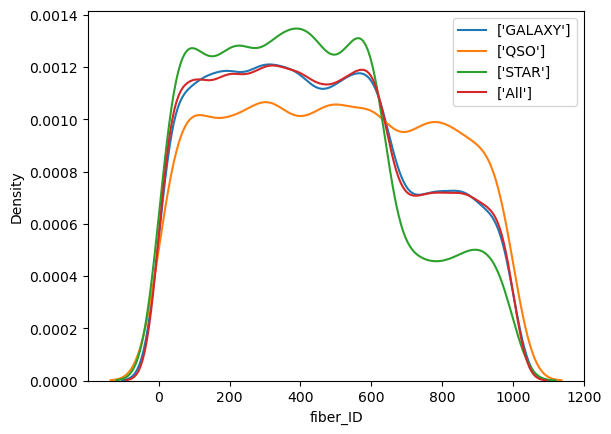

In [24]:
plot('fiber_ID')

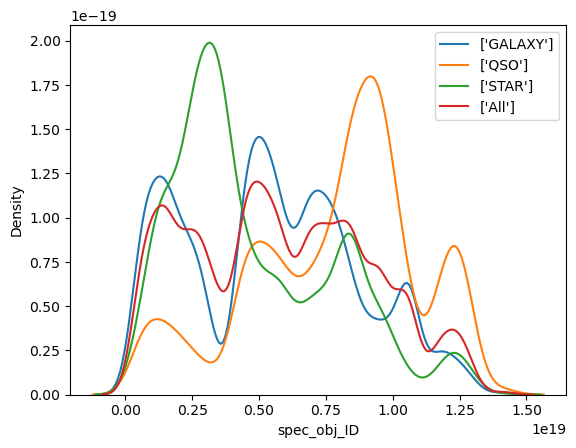

In [25]:
plot('spec_obj_ID')

/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


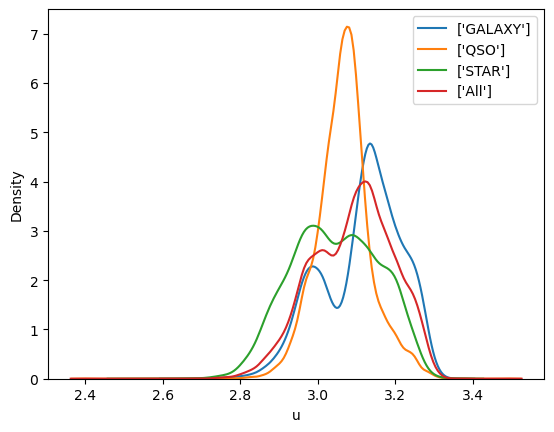

In [27]:
log_plot('u')

/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


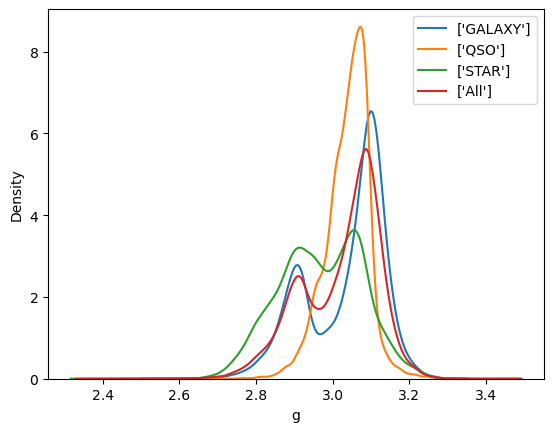

In [28]:
log_plot('g')

/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jaeseung/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


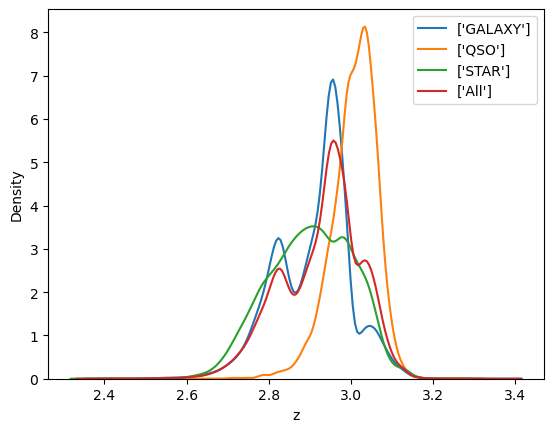

In [29]:
log_plot('z')

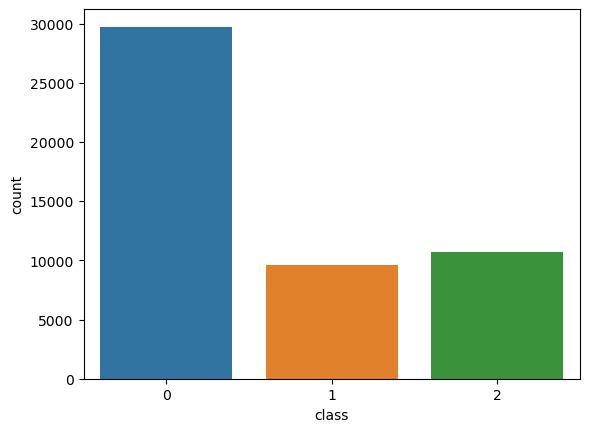

In [30]:
sns.countplot(x=train["class"]);

## Multivariate Analysis


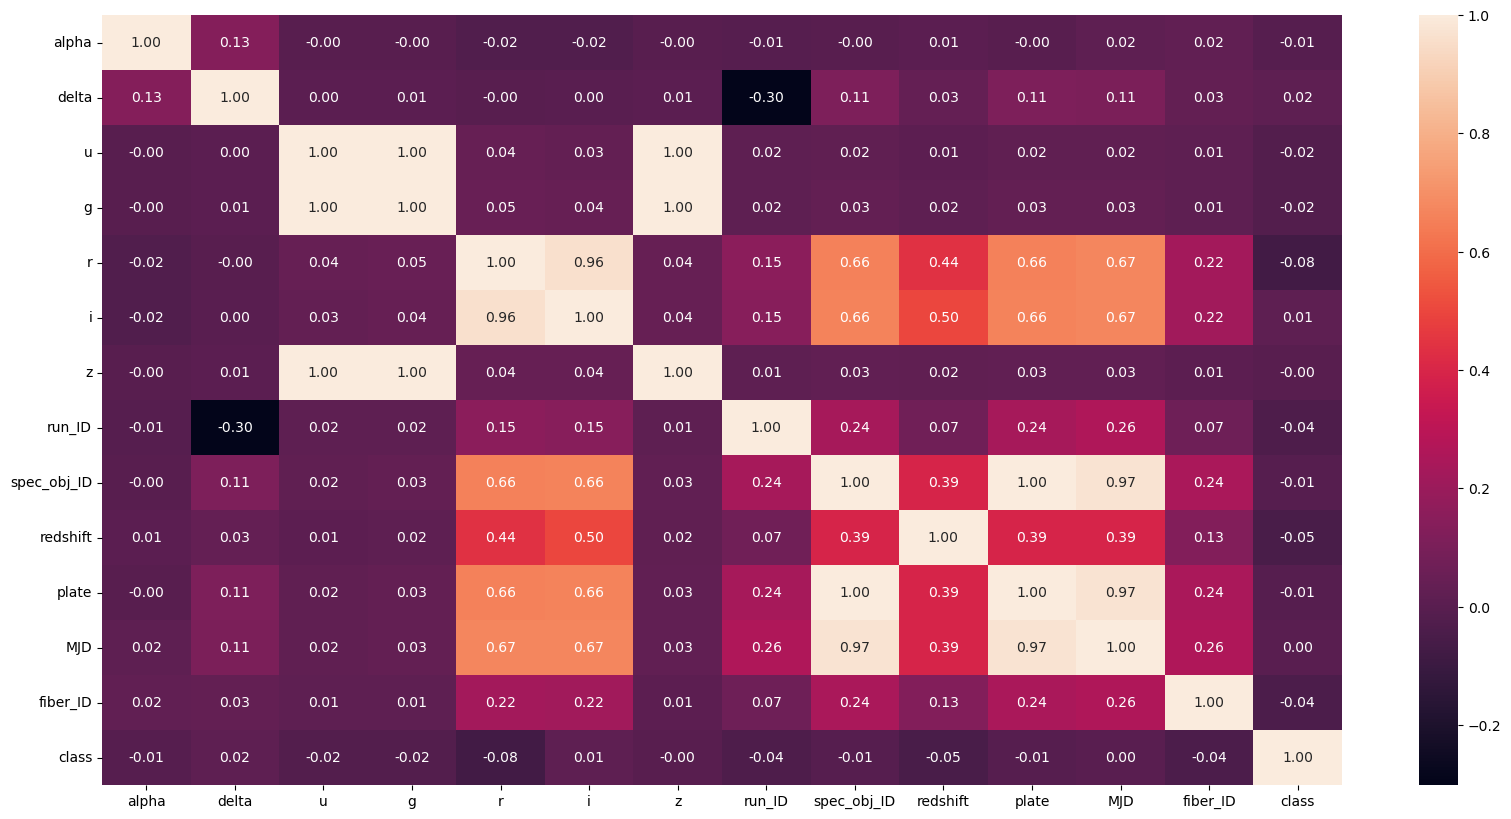

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,fmt=".2f")
plt.show()

# Data Preparation

In [33]:
train.drop(columns=['id', 'rerun_ID', 'cam_col', 'field_ID'], inplace=True)

In [34]:
X_train = train.drop(['class'], axis=1)
Y_train = train[['class']]
print('X Train Shape:', X_train.shape)
print('Y Train Shape:', Y_train.shape)

X Train Shape: (50000, 13)
Y Train Shape: (50000, 1)
